# انتخاب ویژگی با استفاده از آزمون آماری (کای دو)

# ابتدا میایم کتابخونه ها رو وارد محیط میکنیم

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# دیتاستی که قراره روش انتخاب ویژگی انجام بدیم رو وارد محیط میکنیم (فرمت اکسل از کتابحونه پانداز)

In [33]:
dataset = pd.read_excel("C://Users//sh.noori//Desktop//dataset.xlsx")

In [34]:
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


#  برای انتخاب ویژگی ما با مقادیر کار داریم. پس میایم مقادیر ویژگی های مستقل و هدف را مشخص میکنیم

In [35]:
x = dataset.values[:, 0:20]
y= dataset.values [:, 20]

In [36]:
y

array([1., 2., 2., ..., 3., 0., 3.])

# حال قصد داریم 10 فیچر برتر را انتخاب کنیم  

# این بخش را اگر متوجه نشدید، پیام بدید تو تلگرام ویس بذارم براتون

@Sh_N7294

In [37]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
selecting_best_features = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(selecting_best_features.scores_, columns = ['feature score'])

In [38]:
dfscores

,feature score
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


امتیاز 19 تا فیچر مستقل محاسبه شد. حال میریم سراغ تخصیص امتیازها به فیچرهاشون با نوشتن اسامی فیچرها به صورت مقادیر در قالب دیتا فریم

In [39]:
name_of_cols = pd.DataFrame(dataset.columns[0:20], columns=['name of feature'], index= None)

In [40]:
name_of_cols

,name of feature
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [41]:
featureScores = pd.concat([name_of_cols ,dfscores],axis=1)

In [42]:
featureScores

,name of feature,feature score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [43]:
print(featureScores.nlargest(10,'feature score'))

   name of feature  feature score
13             ram  931267.519053
11       px_height   17363.569536
0    battery_power   14129.866576
12        px_width    9810.586750
8        mobile_wt      95.972863
6       int_memory      89.839124
15            sc_w      16.480319
16       talk_time      13.236400
4               fc      10.135166
14            sc_h       9.614878


# شناسایی اهمیت فیچرها در فرآیند یادگیری ماشین

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [47]:
model = ExtraTreesClassifier()
model.fit(x,y)
model_final = model.feature_importances_
print(model_final)

[0.05675655 0.01928087 0.03392357 0.0205503  0.03581864 0.01904039
 0.03720132 0.03682943 0.04107031 0.03540074 0.0347727  0.05029107
 0.04870239 0.37099674 0.03463462 0.03442152 0.03420357 0.01467846
 0.02047916 0.02094764]


C:\Users\sh.noori\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


شما میتونید مثل قبل یک دیتاست از اسم فیچرها و امتیاز اهمیتشون بسازید ولی در نظر داشته باشید الان قرار اونارو رسم کنیم

برای رسم به جای دیتافریم، باید از تابع Series استفاده کنیم

In [48]:
importantfeatures = pd.Series(model_final, index=dataset.columns[0:20])

In [49]:
importantfeatures

battery_power    0.056757
blue             0.019281
clock_speed      0.033924
dual_sim         0.020550
fc               0.035819
four_g           0.019040
int_memory       0.037201
m_dep            0.036829
mobile_wt        0.041070
n_cores          0.035401
pc               0.034773
px_height        0.050291
px_width         0.048702
ram              0.370997
sc_h             0.034635
sc_w             0.034422
talk_time        0.034204
three_g          0.014678
touch_screen     0.020479
wifi             0.020948
dtype: float64

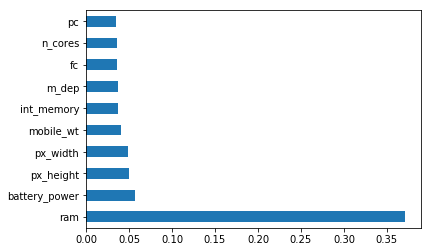

In [51]:
import matplotlib.pyplot as plt
importantfeatures.nlargest(10).plot(kind='barh')
plt.show()